# Automatic detection of times of LoC (Loss of Consciousness) and RoC (Return of Consciousness)

**Goal**

- Load the data
- Compute the LoC and RoC 
- Visualize LoC and RoC on a spectrogram



In [2]:
import mne

from boostlocroc import extract_loc_roc, plot_spectrogram
from boostlocroc.utils import truncate_fif

### Load one EEG file

In [10]:
# Here we load one EEG recording from the vitaldb dataset
filename = "data/0009.vital_eeg.fif"  # "data/example_eeg.fif"
file_tmp = mne.io.read_raw_fif(filename)

Opening raw data file data/vitaldb/0009.vital_eeg.fif...
Isotrak not found
    Range : 0 ... 573327 =      0.000 ...  4479.117 secs
Ready.


### LoC/RoC detection 
Steps : 
1. Preprocess EEG file
2. Estimate times of LoC and Roc using a pretrained ML model
3. Plot spectrogram, predicted probabilities and classification.

**Remark**
The following code is used on an example eeg file but should be easily extended to other dataset. 

The following cell is thus only for pedagogical purposes, but can also serve as an inspection step. 

Creating RawArray with float64 data, n_channels=2, n_times=573294
    Range : 0 ... 573293 =      0.000 ...  4478.852 secs
Ready.
Effective window size : 4.000 (s)


2024-11-08 18:10:32.258419622 [W:onnxruntime:, graph.cc:4285 CleanUnusedInitializersAndNodeArgs] Removing initializer 'classes_ind'. It is not used by any node and should be removed from the model.


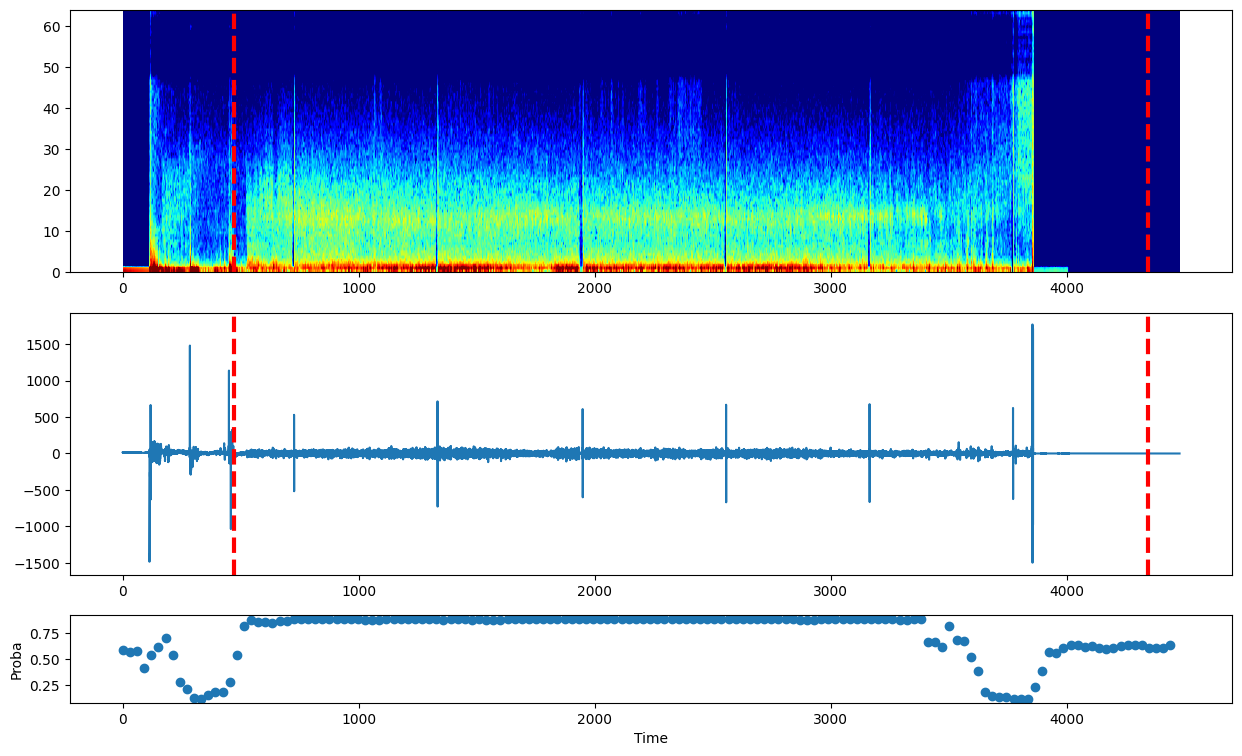

CPU times: user 5.38 s, sys: 460 ms, total: 5.84 s
Wall time: 2.08 s


In [11]:
%%time
# Preprocess EEG recording
file_tmp = truncate_fif(file_tmp)
sfreq = file_tmp.info["sfreq"]
duration_sec = file_tmp.n_times / sfreq

if duration_sec > 5 * 60:
    # Compute LoC and RoC
    time_loc, time_roc, t_proba, proba = extract_loc_roc(file_tmp)

    # Visualize Spectrogram, EEG, and probabilities
    time = file_tmp.times
    fp2 = file_tmp.get_data(picks=1).squeeze() * 10**6  # conversion volts -> microvolts
    plot_spectrogram(time_loc, time_roc, fp2, sfreq, time, t_proba, proba)